In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy import stats
from scipy import optimize
from scipy.stats import norm

    1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

hurricanes [ 3  6  6 11  4 10  5  4  8  5  8  3  5  3  5  6  4  7  9  4  4  4  6  5
  3  7  8  6  2  4  7  6  9  4  2  7  6  8  3  7  9  5  2  4  4  4  3  6
  8  6  8  7 11  7  3  8  7  6  7  6 10  4 10  3  9  6  9  3  9  5  7  3
  4  5  8  5 10  8  0  4 10 11  4  4  7  7  2  2  5 10  7  5  6  4  6  4
  8  4  5  4  4 11  5  8  4  9  8  3  4  5  8  6  2  7  6  4  5  8  9  2
  5  8  9  6  7  2  7  4 10  7  7  8  9 10  5  6  7  3  9  4  7  4 18  4
  5  8  2  3  5  5  3  3  5  5  4  5  9  8  5  8  7 11  3  8  5  2  4  7
  6  8  2  9  7  7  2 11  4  7  5  7  9  7  9  3  4  6  6  6 10  4  9 13
  7  4 10  8  3  8  2  4  9 10  9  3  7  5  6  6 10  7  6  4  4  3  4  5
  9  5  6  4  6 12 11 10 12  6  6  6  5  7 10  4  5  2  3  8  6 12  8 10
  7  8  6 13  8 10  9  4  7  9  7  6  9  4  9  8  9  6  3  6  8  9  6  3
  7  6  8  7  7  7  8  5  7  5  6  6  5  4  7  3  5  6  4  5  5  4  5  8
 12 10  3 11  5 10  8  5  1  3  5  7  7  5 10  2  5  7 10  4  8 10  9  2
  5 10  7 10  8  3  6  4  6  7 12  7  7 

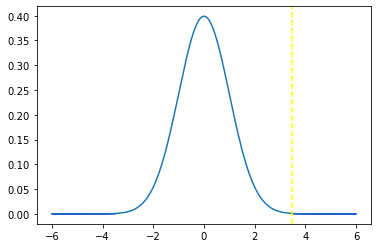

In [31]:
x_rv = poisson.rvs(6.3,size=1000) #historic average 6.3
print("hurricanes",x_rv)
Z = abs(15 - x_rv.mean()) / 2.5 #Z score
print("Z =", Z)
P_value = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs) # only generating random points
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='blue')
plt.axvline(Z, linestyle='--', color='yellow')
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

The value of the test statistic is: T = -3.786997938137629


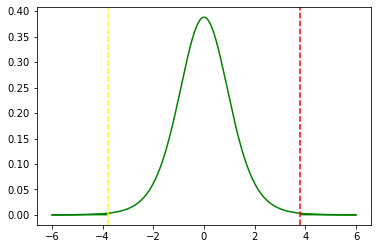

In [30]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100]) # Computation of the test statistic
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)
m_pr = np.mean(pre) # means of the two samples
m_po = np.mean(post)
sigma = np.sqrt((np.var(pre, ddof=1) + np.var(post, ddof=1)) / 2) # sigma used to calculate T
T = (m_pr - m_po) / (sigma * np.sqrt(2 / n)) # test statistic
print("The value of the test statistic is: T =", T)

xs = np.linspace(-6, +6, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts, color="green")
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='g')
plt.axvline(T, linestyle='--', color='yellow')
plt.axvline(-T, linestyle='--', color='red')
plt.show()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

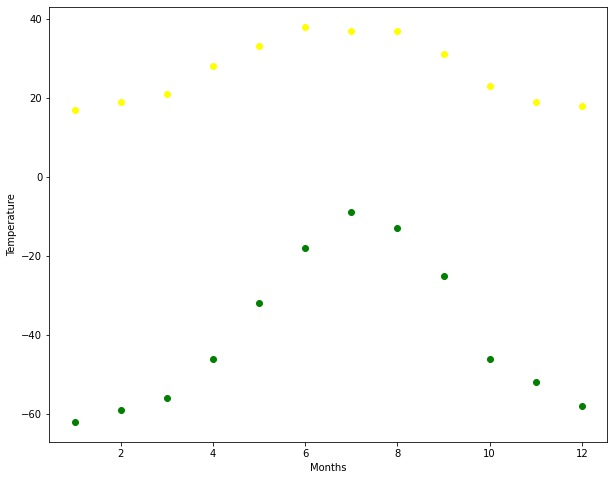

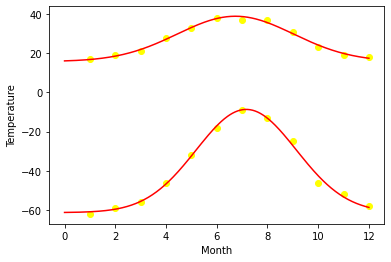

In [39]:
t_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)+1
days = np.linspace(0, 12, 365)
plt.figure(figsize= (10,8))
plt.scatter(months, t_max, color='yellow')
plt.scatter(months, t_min, color ='green')
plt.xlabel('Months')
plt.ylabel('Temperature')
def temps(x, A, mean, s, shift):
    return A * stats.norm.pdf(x, loc=mean, scale=s) + shift
(mean_max,sigma_max) = norm.fit(t_max)
(mean_min,sigma_min) = norm.fit(t_min)
#Fit this function to the data with scipy.optimize.curve_fit()
par_max, cov_max = optimize.curve_fit(temps, months, t_max, p0=(1, mean_max, sigma_max, 0))
par_min, cov_min = optimize.curve_fit(temps, months, t_min, p0=(1, 6, 1, 0))

#plot the results
plt.figure()
plt.plot(months, t_max, 'o',color='yellow')
plt.plot(days, temps(days, *par_max), 'r-')
plt.plot(months, t_min, 'o', color ='yellow')
plt.plot(days, temps(days, *par_min), 'r-')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()
print()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

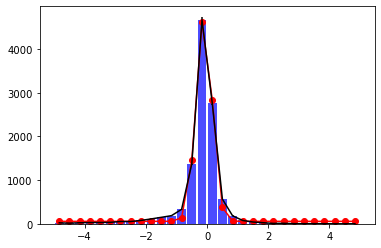

In [40]:
residuals_261 = np.load('residuals_261.pkl', allow_pickle=True)
df=pd.DataFrame(residuals_261.item(), columns=['residuals'])
plt.figure()
n, bins, patches = plt.hist(df, bins=30, color='blue', alpha=0.7, rwidth=0.85, range = (-5,5))
bin_cntr = (bins[:-1] + bins[1:]) / 2.0
sigma = np.sqrt(np.abs(n))
plt.errorbar(x = bin_cntr, y = n, yerr=sigma, color="black")
def gus(x, amp, cen, wid, offset):
     return amp * np.exp(-(x-cen)**2 / (2*wid**2)) + offset
params, cov = optimize.curve_fit(gus, bin_cntr, n)
fitted_gaussian = gus(bin_cntr, *params)
plt.plot(bin_cntr, gus(bin_cntr, *params), marker='o', color='red')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

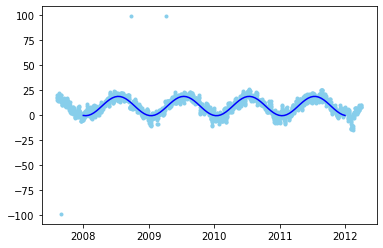

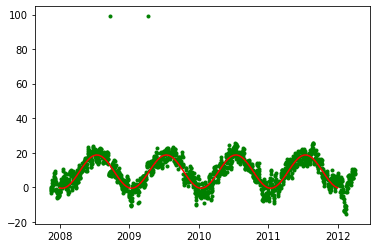

In [42]:

date,temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)
def f_mun(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c
popt, pcov = optimize.curve_fit(f_mun, date, temperature)
plt.figure()
plt.plot(date[4600:6300], temperature[4600:6300], '.',color='skyblue')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, f_mun(xfine, *popt), color='b')
def g_mun(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

popt, pcov = optimize.curve_fit(g_mun, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.',color='g')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, g_mun(xfine, *popt), color='r')